In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data = np.load('results.npz')
# lst = data.files

# for item in lst:
#     print(item)
#     print(data[item])

In [3]:
#  def plot_data(X, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10):
#     plt.figure(figsize=(8,6))
#     plt.plot(X, y1, label='y1')
#     plt.plot(X, y2, label='y2')
#     plt.plot(X, y3, label='y3')
#     plt.plot(X, y4, label='y4')
#     plt.plot(X, y5, label='y5')
#     plt.plot(X, y6, label='y6')
#     plt.plot(X, y7, label='y7')
#     plt.plot(X, y8, label='y8')
#     plt.plot(X, y9, label='y9')
#     plt.plot(X, y10, label='y10')
#     plt.xticks(X)

#     # plt.vlines(X, 0, y, linestyle="dashed")

#     plt.title("Thermal Conductance Of Different Optimal Structures")
#     plt.ylabel("Thermal Conductance")
#     plt.xlabel("Calculated Structures")
#     plt.legend()

#     plt.show()

In [4]:
def plot_data(X, y):
    plt.figure(figsize=(8,6))

    for i in y:
        plt.plot(X, y[i])

    plt.title("Thermal Conductance Of Different Optimal Structures")
    plt.ylabel("Thermal Conductance")
    plt.xlabel("Calculated Structures")
    plt.legend()

    plt.show()

In [5]:
def plot_all(L_all, X):
    plt.figure(figsize=(12,10))

    for i in range(len(L_all)):
        plt.plot(X, L_all[i])

    plt.title("Thermal Conductance Of Different Optimal Structures")
    plt.ylabel("Thermal Conductance")
    plt.xlabel("Calculated Structures")
    
    plt.show()

In [6]:
def find_max(y):
    max_so_far = 0
    y_max = []

    for i in list(y):
        if i > max_so_far:
            max_so_far = i
            y_max.append(max_so_far)
        else:
            y_max.append(max_so_far)
    
    return np.array(y_max)

In [7]:
def find_min(y):
    min_so_far = 1000
    y_min = []

    for i in list(y):
        if i < min_so_far:
            min_so_far = i
            y_min.append(min_so_far)
        else:
            y_min.append(min_so_far)
    
    return np.array(y_min)

In [8]:
data_d = {}

for i in range(1, 11):
    data_d["data{0}".format(i)] = np.load('results/Si-Ge_1010_max/results'+str(i)+'.npz')

data_d['data1'].files

['checked_candidates_DS',
 'checked_candidates_size',
 'checked_candidates',
 'fx',
 'optimal_fx',
 'optimal_candidate',
 'best_fx',
 'max_depth_reached',
 'no_nodes',
 'avg_node_visit']

In [9]:
X = np.arange(1, len(data_d['data1']['fx'])+1, 1)
y_d = {}

for i in range(1,11):
    y_d['y{0}'.format(i)] = data_d['data'+str(i)]['fx']

# y1 = data1['fx']
# y2 = data2['fx']
# y3 = data3['fx']
# y4 = data4['fx']
# y5 = data5['fx']
# y6 = data6['fx']
# y7 = data7['fx']
# y8 = data8['fx']
# y9 = data9['fx']
# y10 = data10['fx']

# plot_data(X, y_d)

In [10]:
# when max_flag=True, use find_max function to plot results

y_max = {}

for i in range(1,11):
    y_max['y{0}_max'.format(i)] = find_max(y_d['y'+str(i)])

# y1_max = find_max(y1)
# y2_max = find_max(y2)
# y3_max = find_max(y3)
# y4_max = find_max(y4)
# y5_max = find_max(y5)
# y6_max = find_max(y6)
# y7_max = find_max(y7)
# y8_max = find_max(y8)
# y9_max = find_max(y9)
# y10_max = find_max(y10)

# plot_data(X, y_max)

In [11]:
data_d = {}

for i in range(1, 11):
    data_d["data{0}".format(i)] = np.load('results/Si-Ge_1010_min/results'+str(i)+'.npz')

In [12]:
X = np.arange(1, len(data_d['data1']['fx'])+1, 1)
y_d = {}

for i in range(1,11):
    y_d['y{0}'.format(i)] = data_d['data'+str(i)]['fx']

No handles with labels found to put in legend.


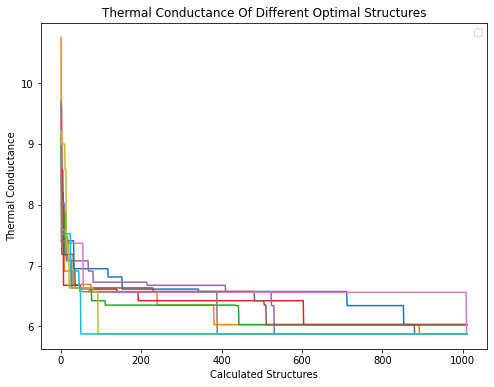

In [13]:
# when max_flag=False, use find_min function to plot results

y_min = {}

for i in range(1,11):
    y_min['y{0}_min'.format(i)] = find_min(y_d['y'+str(i)])

# y1_min = find_min(y1)
# y2_min = find_min(y2)
# y3_min = find_min(y3)
# y4_min = find_min(y4)
# y5_min = find_min(y5)
# y6_min = find_min(y6)
# y7_min = find_min(y7)
# y8_min = find_min(y8)
# y9_min = find_min(y9)
# y10_min = find_min(y10)

plot_data(X, y_min)

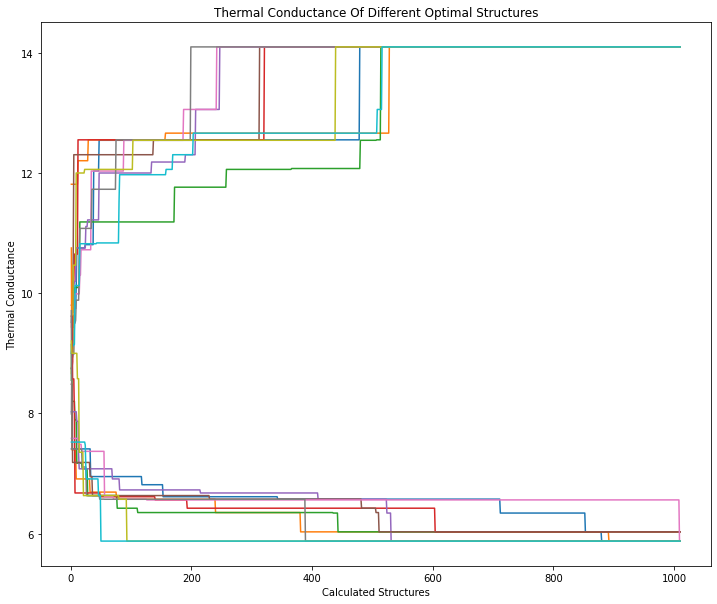

In [28]:
L_all = []

for i in y_max.values():
    L_all.append(i)

for i in y_min.values():
    L_all.append(i)

plot_all(L_all, X)